# Heart diseases


**Context**

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

#### Attribute Information!!!
1. [Content:](#1)
    1. [Age](#1)
    2. [Sex](#2)
    3. [Chest pain type (4 values)](#3)
    4. [Resting blood pressure](#4)
    5. [Serum cholestoral in mg/dl](#5)
    6. [Fasting blood sugar > 120 mg/dl](#6)
    7. [Resting electrocardiographic results (values 0,1,2)](#7)
    8. [Maximum heart rate achieved](#8)
    9. [Exercise induced angina](#9)
    10. [Oldpeak = ST depression induced by exercise relative to rest](#10)
    11. [The slope of the peak exercise ST segment](#11)
    12. [Number of major vessels (0-3) colored by flourosopy](#12)
    13. [Thal: 3 = normal; 6 = fixed defect; 7 = reversable defect](#13)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/HP/Downloads/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
data.corr

<bound method DataFrame.corr of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
5     57    1   0       140   192    0        1      148      0      0.4   
6     56    0   1       140   294    0        0      153      0      1.3   
7     44    1   1       120   263    0        1      173      0      0.0   
8     52    1   2       172   199    1        1      162      0      0.5   
9     57    1   2       150   168    0        1      174      0      1.6   
10    54    1   0       140   239    0        1      160      0      1.2   
11    48    0   2       130   275    0        1      139

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

### Heatmap

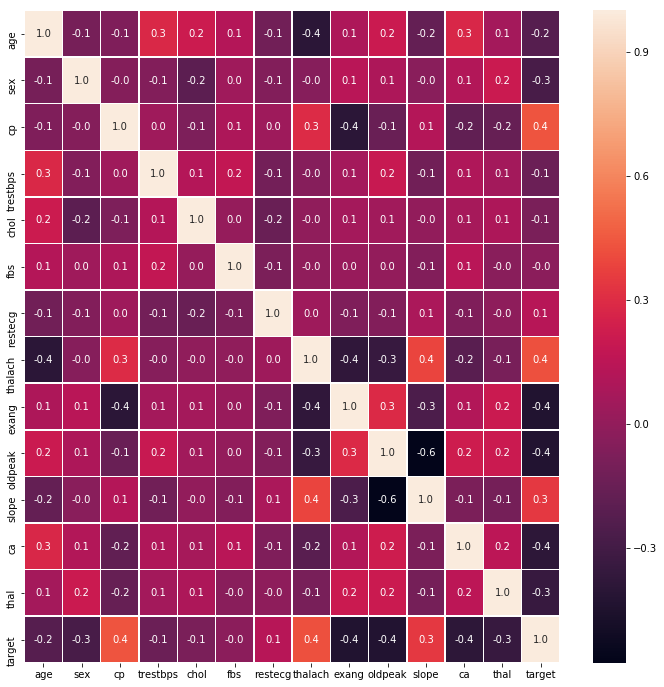

In [10]:
# corrlation map
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()

## Line plot

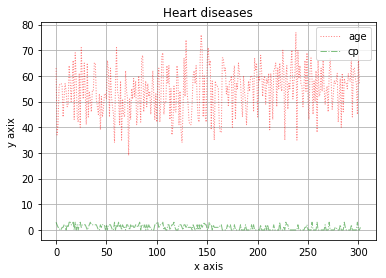

In [11]:
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
data.age.plot(kind='line',color='r',label='age',linewidth=1,alpha=0.5,grid=True,linestyle=':')
data.cp.plot(color= 'g',label= 'cp',linewidth=1, alpha=0.5, grid=True, linestyle='-.')
plt.legend(loc='upper right')
plt.xlabel('x axis')
plt.ylabel('y axix')
plt.title('Heart diseases')
#plt.plot(figsize=(20,20))
plt.show()

## Scatter plot

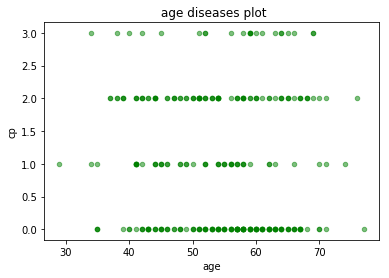

In [12]:
# Scatter Plot 
# x = age, y = chest pain
data.plot(kind='scatter', x = 'age', y = 'cp',alpha=0.5,color='g')
plt.xlabel('age')            
plt.ylabel('cp')
plt.title(' age diseases plot')
plt.show()

### Histogram

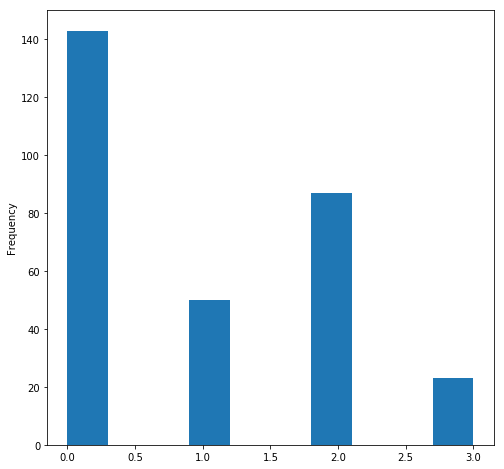

In [13]:
# Histogram
# bins = number of bar in figure
data.cp.plot(kind='hist', bins=10,figsize=(8,8))
plt.show()

In [14]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### Boxplot

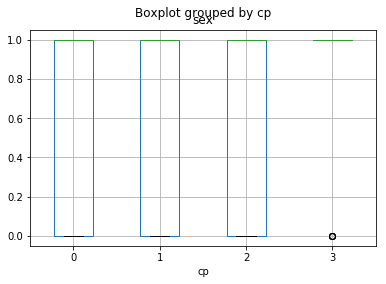

In [15]:
data.boxplot(column='sex', by='cp')

In [16]:
data1 = data['exang'].head()
data1

0    0
1    0
2    0
3    0
4    1
Name: exang, dtype: int64

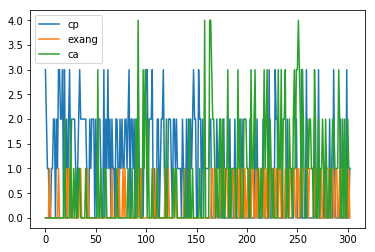

In [17]:
# plotting all data
data1 = data.loc[:,['cp','exang','ca']]
data1.plot()

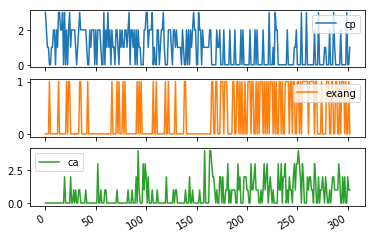

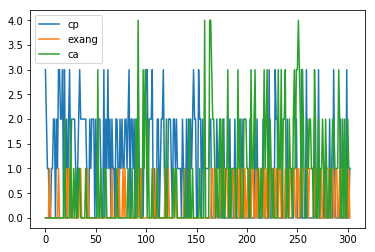

In [18]:
data1.plot(subplots = True)
data1.plot()

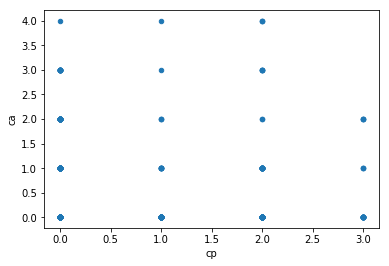

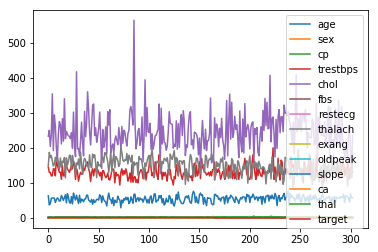

In [19]:
data.plot(kind='scatter', x = 'cp', y = 'ca' )
data.plot()  

### FacetGrid

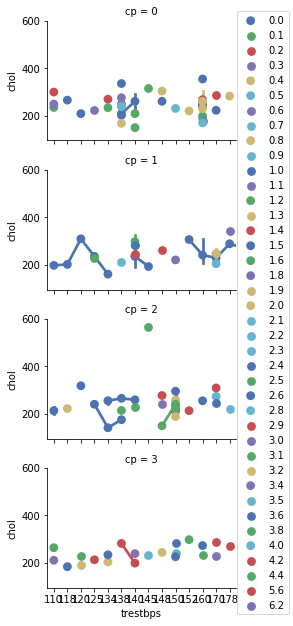

In [20]:
# grid = sns.FacetGrid(data, col='cp')
grid = sns.FacetGrid(data, row='cp', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'trestbps', 'chol', 'oldpeak', palette='deep')
grid.add_legend()

### Pairplot

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

''

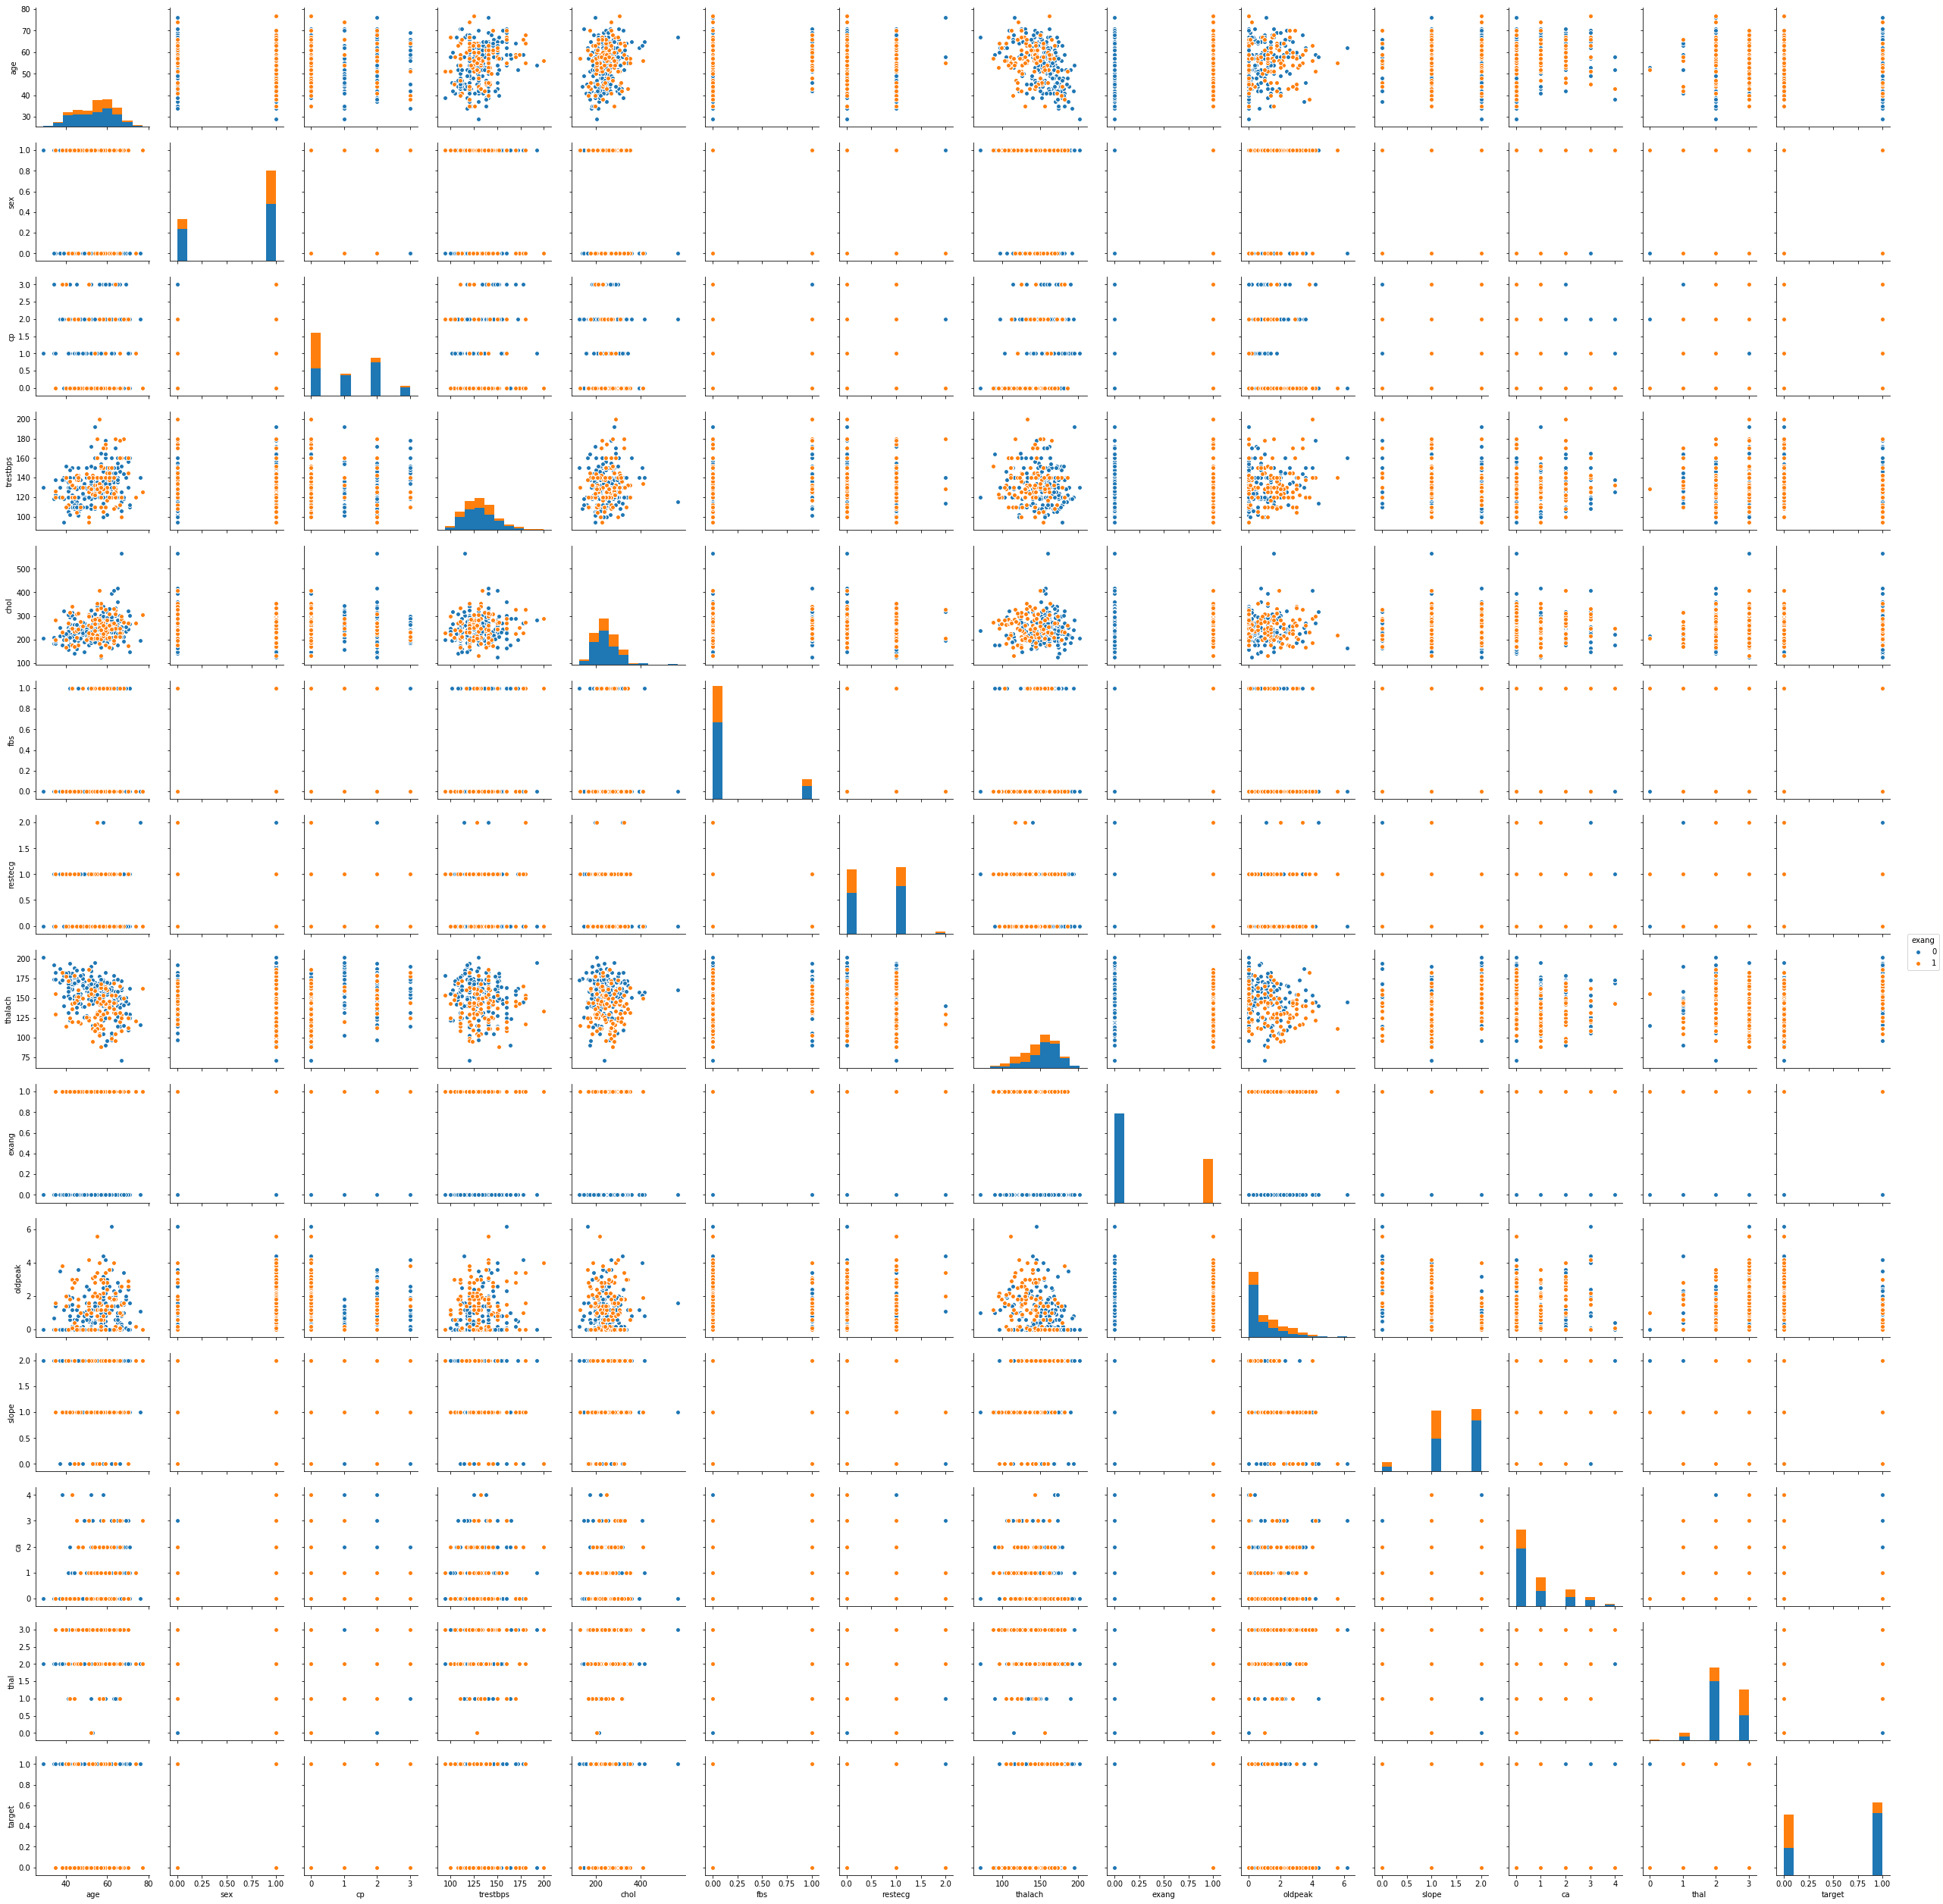

In [22]:
sns.pairplot(data.dropna(), hue='exang')
;

### Distplot

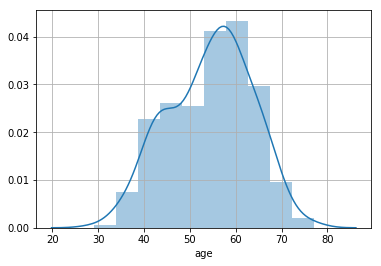

In [23]:
import seaborn as sns
sns.distplot(data.age.dropna(), norm_hist=True, bins=10)
plt.grid()

### Implot

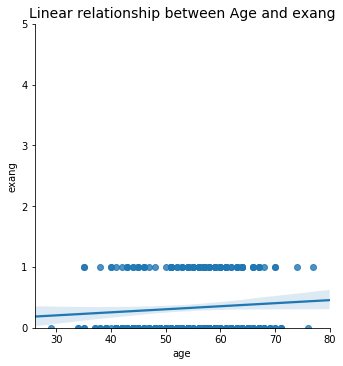

In [27]:
sns.lmplot(x='age', y='exang', data=data)
plt.ylim(0,5)
plt.title('Linear relationship between Age and exang', fontsize=14);

### Implot

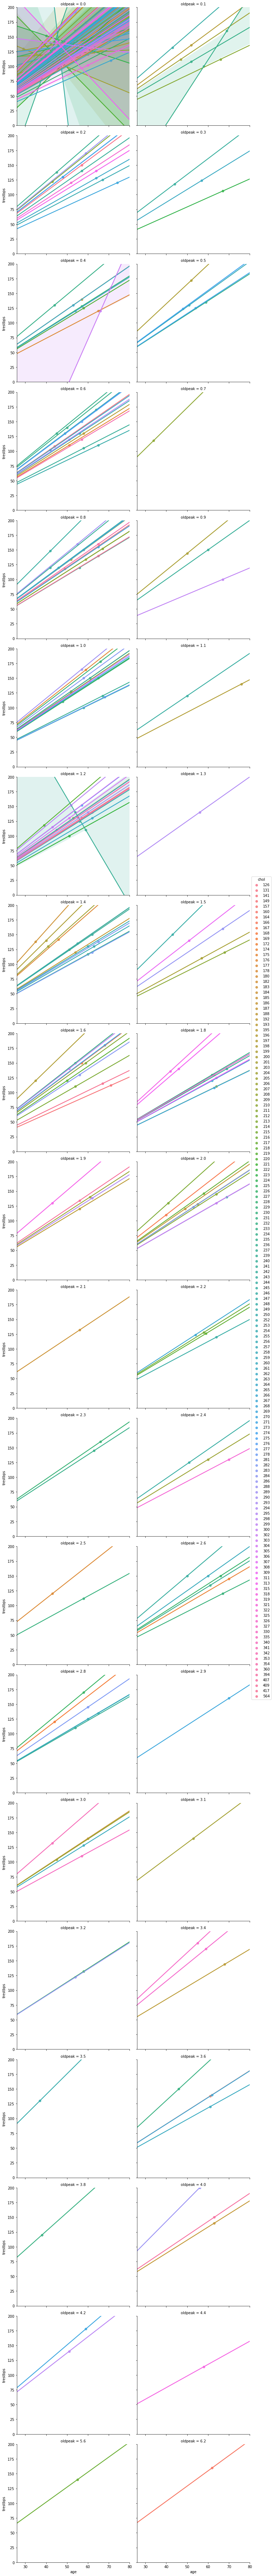

In [31]:
sns.lmplot(x='age', y='trestbps',hue='chol',col='oldpeak', col_wrap=2, data=data.dropna(how='all'))
plt.ylim(0,200);

### Countplot

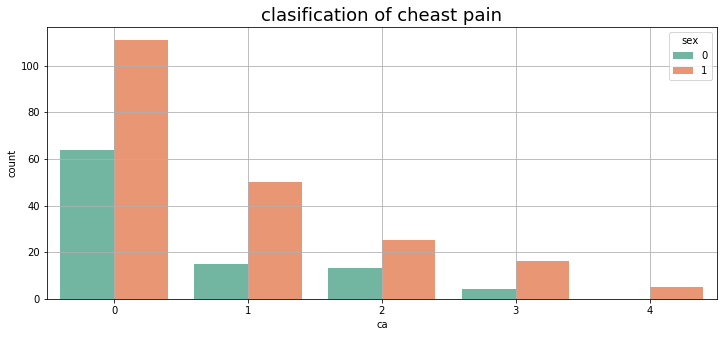

In [33]:
plt.figure(figsize=(12,5))
sns.countplot(x='ca', hue='sex', data=data, palette='Set2')
plt.grid()
plt.title("clasification of cheast pain", fontsize=18);

### FacetGrid

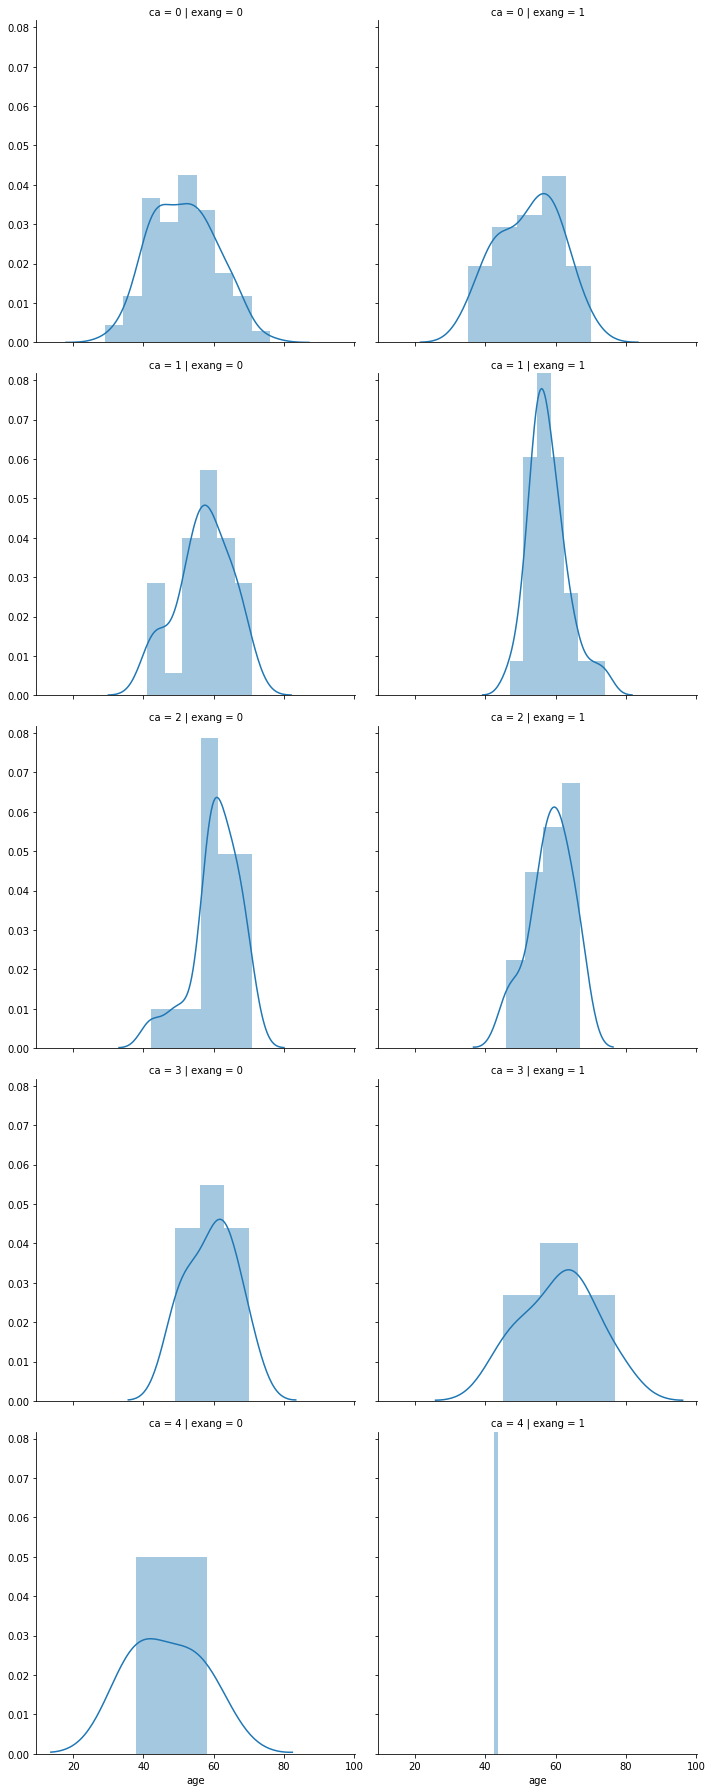

In [35]:
g=sns.FacetGrid(data, row='ca', col='exang', size=5)
g.map(sns.distplot, "age");